<a href="https://colab.research.google.com/github/WENDELLDELIMA/Mestrado_Mackenzie_Aprendizado_Maquina/blob/main/MLPXPROPHET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install squarify

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0mbjou8h/b3o94nt9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0mbjou8h/rl4_uneb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88933', 'data', 'file=/tmp/tmp0mbjou8h/b3o94nt9.json', 'init=/tmp/tmp0mbjou8h/rl4_uneb.json', 'output', 'file=/tmp/tmp0mbjou8h/prophet_modele989xlgx/prophet_model-20251003025022.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:50:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:50:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:

🔹 Importando dados...
✅ Dados preparados: (5208, 6)


/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


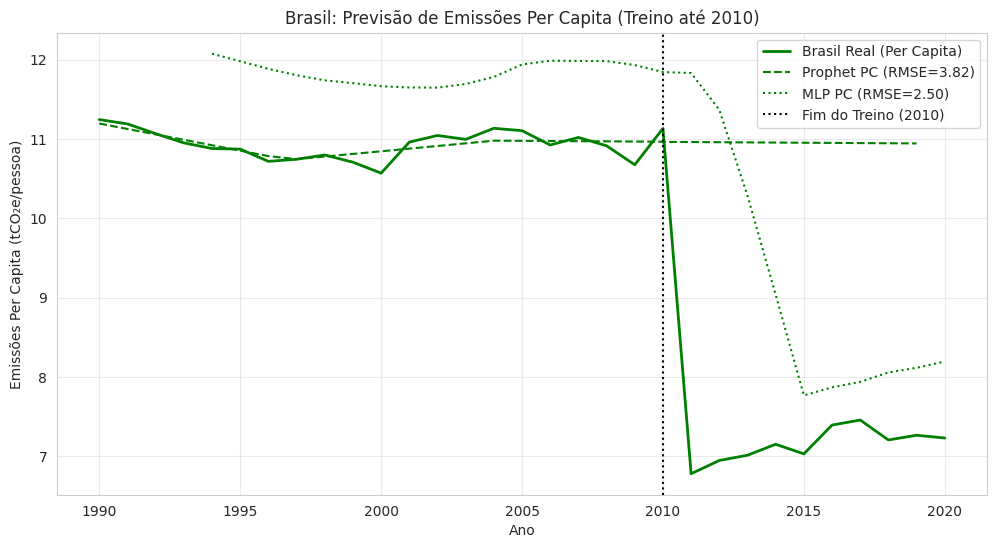

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0mbjou8h/j85oauzb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0mbjou8h/fr_xnr06.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78146', 'data', 'file=/tmp/tmp0mbjou8h/j85oauzb.json', 'init=/tmp/tmp0mbjou8h/fr_xnr06.json', 'output', 'file=/tmp/tmp0mbjou8h/prophet_modelhtbvts60/prophet_model-20251003025022.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:50:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:50:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:


🔎 Brasil (Per Capita):
- RMSE Prophet (2011+) = 3.82
- RMSE MLP (2011+) = 2.50


/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


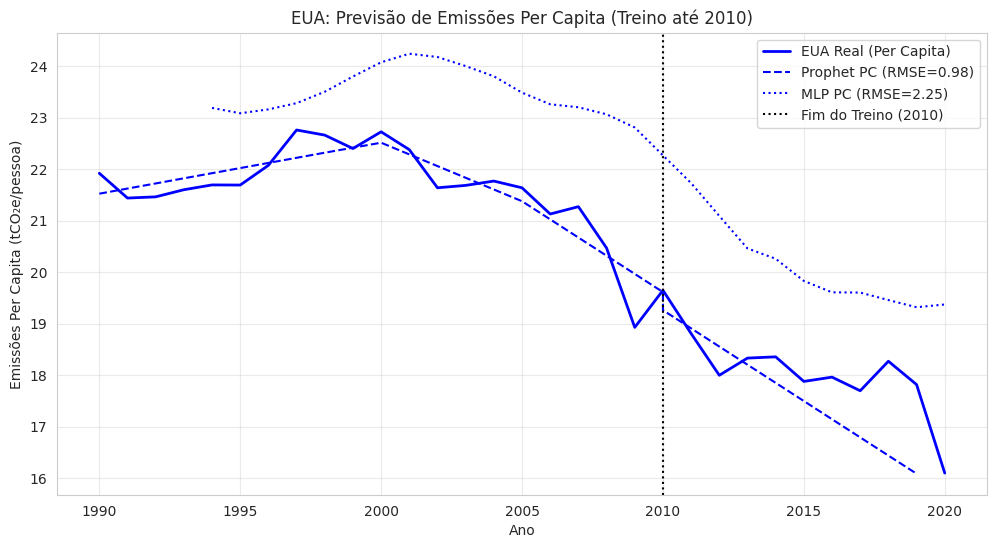

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0mbjou8h/3db0czi0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0mbjou8h/m2e4f7dm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36070', 'data', 'file=/tmp/tmp0mbjou8h/3db0czi0.json', 'init=/tmp/tmp0mbjou8h/m2e4f7dm.json', 'output', 'file=/tmp/tmp0mbjou8h/prophet_modelsm6fcp7w/prophet_model-20251003025023.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:50:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:50:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:


🔎 EUA (Per Capita):
- RMSE Prophet (2011+) = 0.98
- RMSE MLP (2011+) = 2.25


/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


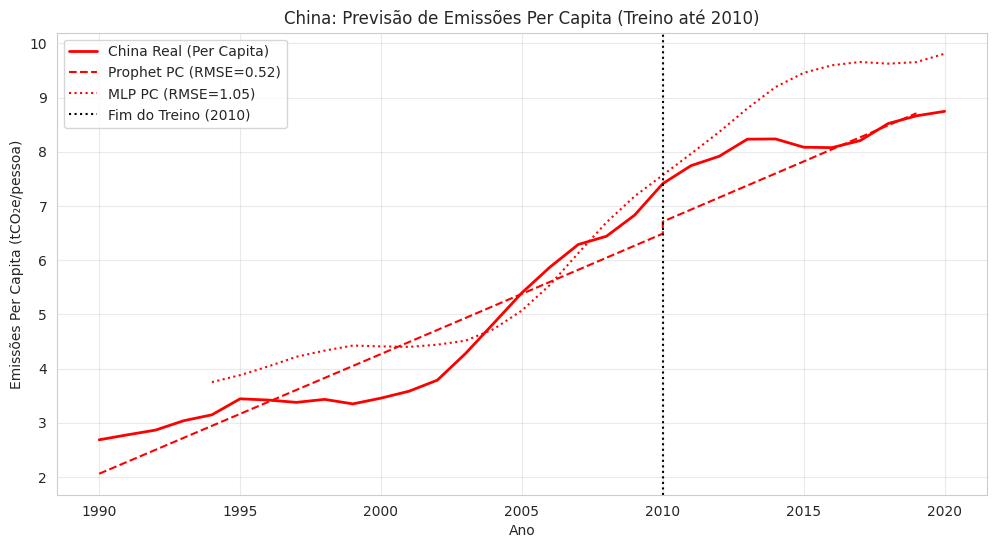


🔎 China (Per Capita):
- RMSE Prophet (2011+) = 0.52
- RMSE MLP (2011+) = 1.05


In [ ]:
# ============================================
# ESTUDO DE CASO: EMISSÕES DE CO2e - Per Capita
# Comparação Prophet vs MLP (1990–2010 treino, 2011+ teste)
# ============================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from prophet import Prophet

sns.set_style("whitegrid")

# ============================================
# 1. Carregar e preparar os dados
# ============================================
print("🔹 Importando dados...")

df_emissoes = pd.read_csv("ghg-emissions.csv")
df_pop = pd.read_csv("populacional.csv")

# Emissões
anos_emissoes = [col for col in df_emissoes.columns if col.isdigit()]
df_emissoes_long = df_emissoes.melt(
    id_vars=["iso","Country/Region"],
    value_vars=anos_emissoes,
    var_name="ano",
    value_name="emissao_MtCO2e"
)
df_emissoes_long["ano"] = df_emissoes_long["ano"].astype(int)
df_emissoes_long["emissao_MtCO2e"] = pd.to_numeric(df_emissoes_long["emissao_MtCO2e"], errors="coerce")

# População
df_pop_filtrado = df_pop[df_pop["Indicator Code"]=="SP.POP.TOTL"].copy()
anos_pop = [col for col in df_pop_filtrado.columns if col.isdigit()]
df_pop_long = df_pop_filtrado.melt(
    id_vars=["Country Code","Country Name"],
    value_vars=anos_pop,
    var_name="ano",
    value_name="populacao_total"
)
df_pop_long.rename(columns={"Country Code":"iso","Country Name":"Country/Region"}, inplace=True)
df_pop_long["ano"] = df_pop_long["ano"].astype(int)
df_pop_long["populacao_total"] = pd.to_numeric(df_pop_long["populacao_total"], errors="coerce")

# Merge
df_final = pd.merge(df_emissoes_long, df_pop_long, on=["iso","Country/Region","ano"], how="inner")
df_final["emissao_per_capita"] = (df_final["emissao_MtCO2e"]*1e6) / df_final["populacao_total"]

print("✅ Dados preparados:", df_final.shape)


# ============================================
# 2. Funções de Previsão
# ============================================

def prever_prophet_percapita(df, iso):
    df_pais = df[df["iso"]==iso][["ano","emissao_per_capita"]].dropna().copy()
    df_pais["ds"] = pd.to_datetime(df_pais["ano"].astype(str)+"-01-01")
    df_pais.rename(columns={"emissao_per_capita":"y"}, inplace=True)

    # Treino até 2010
    df_treino = df_pais[df_pais["ano"]<=2010].copy()
    df_teste = df_pais[df_pais["ano"]>2010].copy()

    m = Prophet(yearly_seasonality=False)
    m.fit(df_treino[["ds","y"]])

    # Previsão até o último ano
    future = m.make_future_dataframe(periods=len(df_teste), freq="Y")
    forecast = m.predict(future)
    forecast["ano"] = forecast["ds"].dt.year

    df_merge = pd.merge(df_pais, forecast[["ano","yhat"]], on="ano", how="left")

    # Calcular RMSE somente para anos pós-2010
    df_merge_filtered = df_merge[df_merge["ano"] > 2010].dropna(subset=['y','yhat'])
    rmse = np.nan
    if not df_merge_filtered.empty:
        rmse = np.sqrt(mean_squared_error(df_merge_filtered["y"], df_merge_filtered["yhat"]))
    return df_merge, rmse


# Criar lags
def criar_janelas(df_pais, janela=4):
    df = df_pais.copy()
    for lag in range(1, janela+1):
        df[f"lag_{lag}"] = df["emissao_per_capita"].shift(lag)
    return df.dropna()

def prever_mlp_percapita_com_lags(df, iso, janela=4):
    df_pais = df[df["iso"]==iso][["ano","emissao_per_capita"]].dropna()
    df_pais = criar_janelas(df_pais, janela)

    X = df_pais[[f"lag_{i}" for i in range(1, janela+1)]]
    y = df_pais["emissao_per_capita"]

    # Split treino e teste
    X_train = X[df_pais["ano"]<=2010]
    y_train = y[df_pais["ano"]<=2010]

    X_test = X[df_pais["ano"]>2010]
    y_test = y[df_pais["ano"]>2010]

    mlp = MLPRegressor(hidden_layer_sizes=(50,30), max_iter=3000, random_state=42)
    mlp.fit(X_train, y_train)

    df_pais["yhat_mlp"] = mlp.predict(X)

    rmse = np.sqrt(mean_squared_error(y_test, df_pais.loc[df_pais["ano"]>2010,"yhat_mlp"]))
    return df_pais, rmse


# ============================================
# 3. Comparação (Per Capita apenas)
# ============================================

for iso, nome, cor in [("BRA","Brasil","green"),("USA","EUA","blue"),("CHN","China","red")]:
    df_prophet_pc, rmse_p_pc = prever_prophet_percapita(df_final, iso)
    df_mlp_pc, rmse_m_pc = prever_mlp_percapita_com_lags(df_final, iso, janela=4)

    plt.figure(figsize=(12,6))
    plt.plot(df_prophet_pc["ano"], df_prophet_pc["y"], label=f"{nome} Real (Per Capita)", color=cor, linewidth=2)
    plt.plot(df_prophet_pc["ano"], df_prophet_pc["yhat"], label=f"Prophet PC (RMSE={rmse_p_pc:.2f})", linestyle="--", color=cor)
    plt.plot(df_mlp_pc["ano"], df_mlp_pc["yhat_mlp"], label=f"MLP PC (RMSE={rmse_m_pc:.2f})", linestyle=":", color=cor)
    plt.axvline(2010, color="black", linestyle=":", label="Fim do Treino (2010)")
    plt.title(f"{nome}: Previsão de Emissões Per Capita (Treino até 2010)")
    plt.xlabel("Ano")
    plt.ylabel("Emissões Per Capita (tCO₂e/pessoa)")
    plt.legend()
    plt.grid(True, alpha=0.4)
    plt.show()

    print(f"\n🔎 {nome} (Per Capita):")
    print(f"- RMSE Prophet (2011+) = {rmse_p_pc:.2f}")
    print(f"- RMSE MLP (2011+) = {rmse_m_pc:.2f}")


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0mbjou8h/_y_qf7ma.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0mbjou8h/mq8_p_io.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91856', 'data', 'file=/tmp/tmp0mbjou8h/_y_qf7ma.json', 'init=/tmp/tmp0mbjou8h/mq8_p_io.json', 'output', 'file=/tmp/tmp0mbjou8h/prophet_modelwvsf7_3m/prophet_model-20251003025728.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:57:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



🔹 Brasil - Avaliação Per Capita (Treino até 2010)


02:57:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


  Prophet: RMSE = 3.82
  Janela 2: RMSE = 1.63
  Janela 3: RMSE = 1.84
  Janela 6: RMSE = 2.20
  Janela 5: RMSE = 2.36
  Janela 8: RMSE = 2.49
  Janela 4: RMSE = 2.50
  Janela 9: RMSE = 3.01
  Janela 7: RMSE = 3.30
  Janela 10: RMSE = 3.32
👉 Melhor MLP: Janela 2 anos, RMSE = 1.63


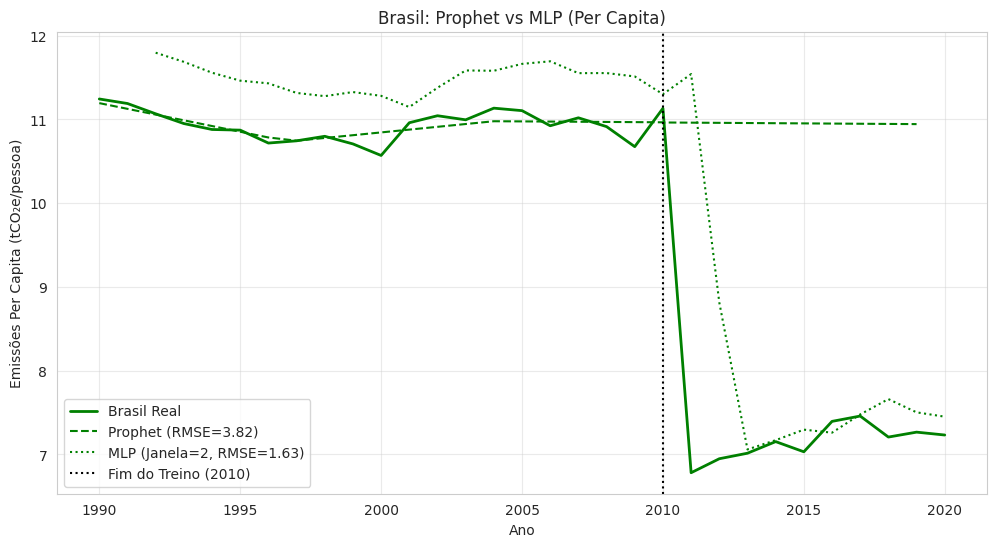

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 15.



🔹 EUA - Avaliação Per Capita (Treino até 2010)


DEBUG:cmdstanpy:input tempfile: /tmp/tmp0mbjou8h/lupkzcsj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0mbjou8h/74t77z2e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68074', 'data', 'file=/tmp/tmp0mbjou8h/lupkzcsj.json', 'init=/tmp/tmp0mbjou8h/74t77z2e.json', 'output', 'file=/tmp/tmp0mbjou8h/prophet_model3n1kfmzo/prophet_model-20251003025729.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:57:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:57:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


  Prophet: RMSE = 0.98


/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


  Janela 5: RMSE = 0.61
  Janela 3: RMSE = 1.07
  Janela 2: RMSE = 1.32
  Janela 8: RMSE = 1.83
  Janela 6: RMSE = 2.09
  Janela 4: RMSE = 2.25
  Janela 10: RMSE = 2.78
  Janela 9: RMSE = 2.98
  Janela 7: RMSE = 3.48
👉 Melhor MLP: Janela 5 anos, RMSE = 0.61


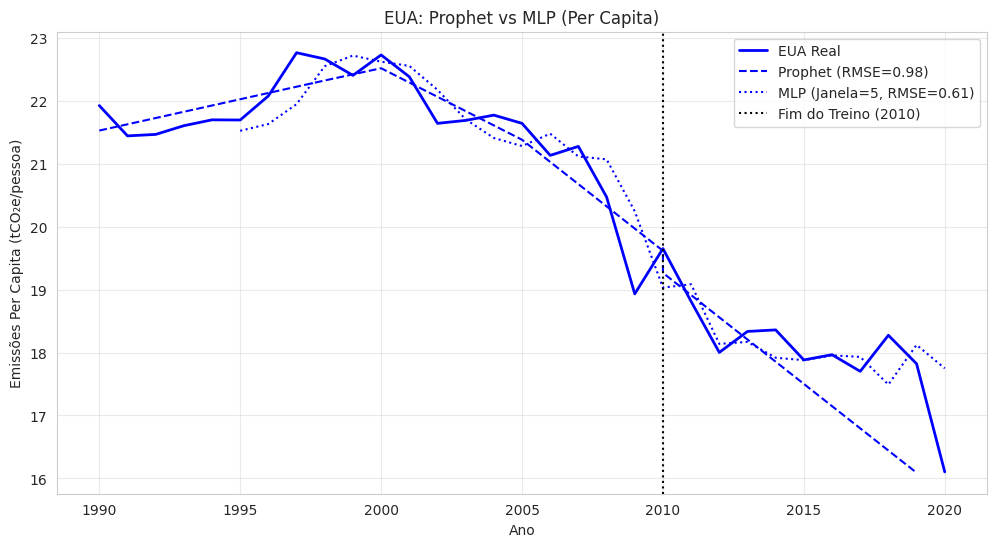


🔹 China - Avaliação Per Capita (Treino até 2010)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0mbjou8h/vq1ag7oy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0mbjou8h/ytvkofod.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41362', 'data', 'file=/tmp/tmp0mbjou8h/vq1ag7oy.json', 'init=/tmp/tmp0mbjou8h/ytvkofod.json', 'output', 'file=/tmp/tmp0mbjou8h/prophet_model1idzlwzl/prophet_model-20251003025730.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:57:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:57:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:

  Prophet: RMSE = 0.52


/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


  Janela 5: RMSE = 0.51
  Janela 3: RMSE = 0.95
  Janela 4: RMSE = 1.05
  Janela 2: RMSE = 1.23
  Janela 6: RMSE = 1.66
  Janela 8: RMSE = 1.98
  Janela 10: RMSE = 2.42
  Janela 9: RMSE = 2.62
  Janela 7: RMSE = 3.11
👉 Melhor MLP: Janela 5 anos, RMSE = 0.51


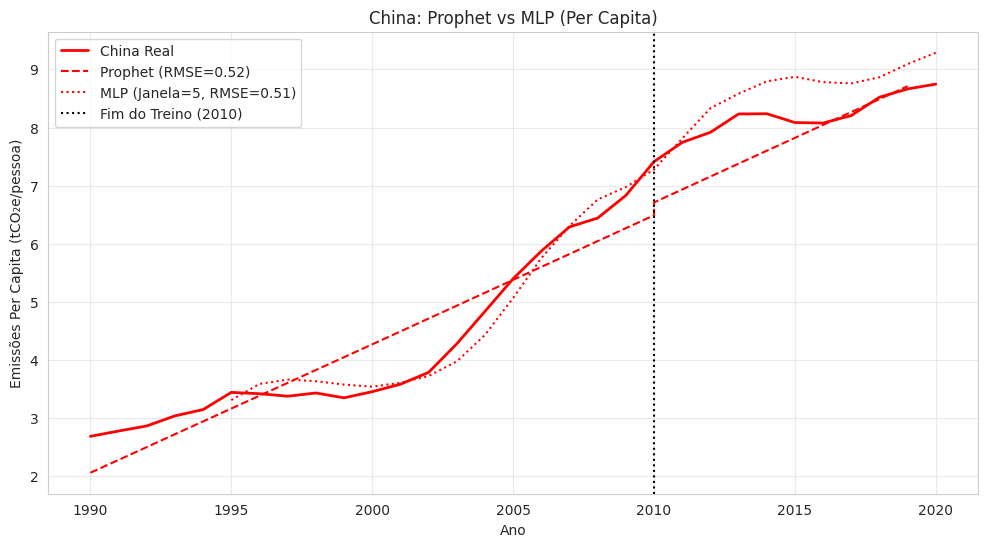

In [ ]:
# ============================================
# Função Prophet (Per Capita)
# ============================================
def prever_prophet_percapita(df, iso):
    df_pais = df[df["iso"]==iso][["ano","emissao_per_capita"]].dropna().copy()
    df_pais["ds"] = pd.to_datetime(df_pais["ano"].astype(str)+"-01-01")
    df_pais.rename(columns={"emissao_per_capita":"y"}, inplace=True)

    # Split treino e teste
    df_treino = df_pais[df_pais["ano"]<=2010].copy()
    df_teste = df_pais[df_pais["ano"]>2010].copy()

    m = Prophet(yearly_seasonality=False)
    m.fit(df_treino[["ds","y"]])

    future = m.make_future_dataframe(periods=len(df_teste), freq="Y")
    forecast = m.predict(future)
    forecast["ano"] = forecast["ds"].dt.year

    df_merge = pd.merge(df_pais, forecast[["ano","yhat"]], on="ano", how="left")

    # RMSE apenas pós-2010
    df_merge_filtered = df_merge[df_merge["ano"] > 2010].dropna(subset=['y','yhat'])
    rmse = np.nan
    if not df_merge_filtered.empty:
        rmse = np.sqrt(mean_squared_error(df_merge_filtered["y"], df_merge_filtered["yhat"]))
    return df_merge, rmse


# ============================================
# Funções MLP com janelas
# ============================================
def criar_janelas(df_pais, janela=4):
    df = df_pais.copy()
    for lag in range(1, janela+1):
        df[f"lag_{lag}"] = df["emissao_per_capita"].shift(lag)
    return df.dropna()

def avaliar_mlp_percapita_com_janelas(df, iso, min_janela=2, max_janela=10):
    resultados = []
    for janela in range(min_janela, max_janela+1):
        df_pais = df[df["iso"]==iso][["ano","emissao_per_capita"]].dropna()
        df_pais = criar_janelas(df_pais, janela)

        X = df_pais[[f"lag_{i}" for i in range(1, janela+1)]]
        y = df_pais["emissao_per_capita"]

        # Split treino e teste
        X_train = X[df_pais["ano"]<=2010]
        y_train = y[df_pais["ano"]<=2010]
        X_test = X[df_pais["ano"]>2010]
        y_test = y[df_pais["ano"]>2010]

        if len(X_test)==0 or len(X_train)==0:
            continue

        mlp = MLPRegressor(hidden_layer_sizes=(50,30), max_iter=3000, random_state=42)
        mlp.fit(X_train, y_train)

        df_pais["yhat_mlp"] = mlp.predict(X)

        rmse = np.sqrt(mean_squared_error(y_test, df_pais.loc[df_pais["ano"]>2010,"yhat_mlp"]))
        resultados.append((janela, rmse, df_pais.copy()))

    return resultados


# ============================================
# Comparação Prophet vs MLP (várias janelas)
# ============================================

for iso, nome, cor in [("BRA","Brasil","green"),("USA","EUA","blue"),("CHN","China","red")]:
    print(f"\n🔹 {nome} - Avaliação Per Capita (Treino até 2010)")

    # Prophet
    df_prophet, rmse_prophet = prever_prophet_percapita(df_final, iso)
    print(f"  Prophet: RMSE = {rmse_prophet:.2f}")

    # MLP com várias janelas
    resultados_mlp = avaliar_mlp_percapita_com_janelas(df_final, iso, 2, 10)
    resultados_mlp.sort(key=lambda x: x[1])  # ordenar pelo RMSE
    melhor_janela, melhor_rmse, df_melhor = resultados_mlp[0]

    # Print tabela de RMSE por janela
    for janela, rmse, _ in resultados_mlp:
        print(f"  Janela {janela}: RMSE = {rmse:.2f}")

    print(f"👉 Melhor MLP: Janela {melhor_janela} anos, RMSE = {melhor_rmse:.2f}")

    # Plot comparação Prophet vs Melhor MLP
    plt.figure(figsize=(12,6))
    plt.plot(df_prophet["ano"], df_prophet["y"], label=f"{nome} Real", color=cor, linewidth=2)
    plt.plot(df_prophet["ano"], df_prophet["yhat"], label=f"Prophet (RMSE={rmse_prophet:.2f})", linestyle="--", color=cor)
    plt.plot(df_melhor["ano"], df_melhor["yhat_mlp"], label=f"MLP (Janela={melhor_janela}, RMSE={melhor_rmse:.2f})", linestyle=":", color=cor)
    plt.axvline(2010, color="black", linestyle=":", label="Fim do Treino (2010)")
    plt.title(f"{nome}: Prophet vs MLP (Per Capita)")
    plt.xlabel("Ano")
    plt.ylabel("Emissões Per Capita (tCO₂e/pessoa)")
    plt.legend()
    plt.grid(True, alpha=0.4)
    plt.show()
